In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from scipy.stats import t, norm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss




# Step 1: Load and Add Returns to DataFrame




In [6]:
import pandas as pd
import yfinance as yf
import numpy as np
from scipy.stats import t, norm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# Load your JSON file
data = pd.read_json("dat.json")

# Add '.NS' to all stock names
data["name"] = data["name"] + ".NS"


In [7]:
# Function to calculate returns
def calculate_returns(ticker):
    try:
        stock_data = yf.download(ticker, period="5y")
        close_prices = stock_data['Adj Close']
        six_month_return = (close_prices[-1] - close_prices[-126]) / close_prices[-126] if len(close_prices) > 126 else np.nan
        one_year_return = (close_prices[-1] - close_prices[-252]) / close_prices[-252] if len(close_prices) > 252 else np.nan
        five_year_return = (close_prices[-1] - close_prices[0]) / close_prices[0] if len(close_prices) > 0 else np.nan
        return six_month_return, one_year_return, five_year_return
    except Exception as e:
        return np.nan, np.nan, np.nan

# Add returns to DataFrame
returns = []
for stock in data["name"]:
    six_month, one_year, five_year = calculate_returns(stock)
    returns.append({"6M Return": six_month, "1Y Return": one_year, "5Y Return": five_year})

returns_df = pd.DataFrame(returns)
data = pd.concat([data, returns_df], axis=1)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

#Step 2: Analyze Probability Distributions


[*********************100%***********************]  1 of 1 completed


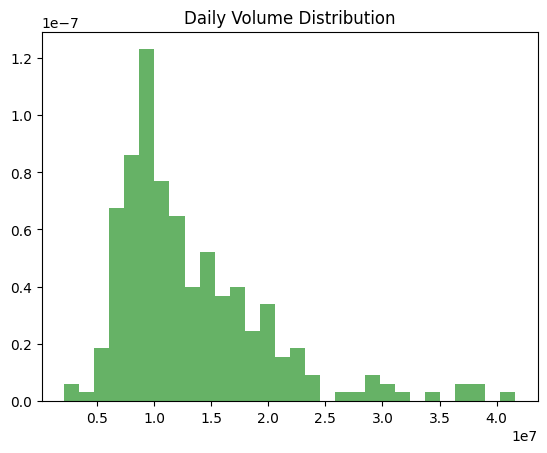

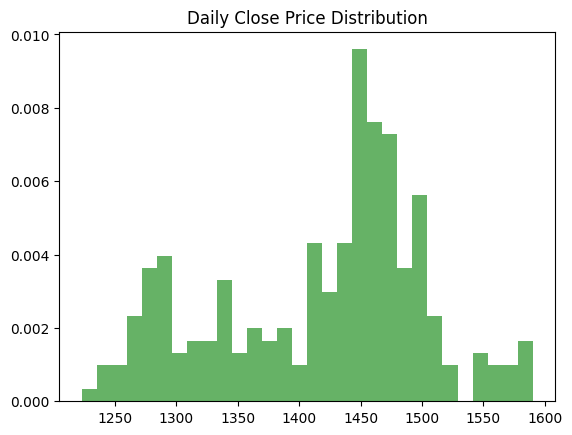

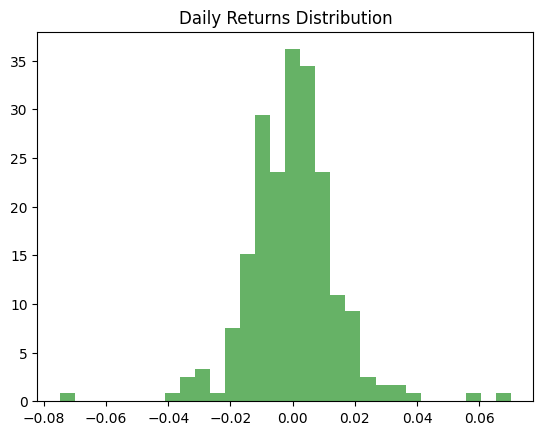

In [8]:
# Select a stock
stock_ticker = "RELIANCE.NS"
stock_data = yf.download(stock_ticker, period="1y")

# Calculate daily returns
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()

# Plot probability distributions
def plot_distribution(data, title):
    plt.hist(data.dropna(), bins=30, density=True, alpha=0.6, color='g')
    plt.title(title)
    plt.show()

plot_distribution(stock_data['Volume'], "Daily Volume Distribution")
plot_distribution(stock_data['Adj Close'], "Daily Close Price Distribution")
plot_distribution(stock_data['Daily Return'], "Daily Returns Distribution")



Step 3: Statistical Metrics (T-Score, Z-Score, Confidence Interval)


In [9]:
# T-Score and Z-Score
mean_return = stock_data['Daily Return'].mean()
std_return = stock_data['Daily Return'].std()

t_score = (mean_return - 0) / (std_return / np.sqrt(len(stock_data['Daily Return'].dropna())))
z_score = (mean_return - 0) / std_return

# Confidence Interval
confidence_interval = norm.interval(0.95, loc=mean_return, scale=std_return / np.sqrt(len(stock_data['Daily Return'].dropna())))

print(f"T-Score: {t_score}")
print(f"Z-Score: {z_score}")
print(f"95% Confidence Interval: {confidence_interval}")



T-Score: 0.008732702870658833
Z-Score: 0.0005567767992433437
95% Confidence Interval: (-0.0017876837391714061, 0.0018036852363466011)


Step 4: Stationary/Non-Stationary Analysis


In [10]:
# KPSS Test
def kpss_test(series):
    statistic, p_value, _, _ = kpss(series, regression='c')
    return p_value > 0.05

# ADF Test
def adf_test(series):
    statistic, p_value, _, _, _, _ = adfuller(series)
    return p_value < 0.05

# Check for stationarity
stationarity_results = []
for stock in data["name"][:2]:  # Example with the first two stocks
    stock_data = yf.download(stock, period="1y")['Adj Close'].dropna()
    kpss_result = kpss_test(stock_data)
    adf_result = adf_test(stock_data)
    stationarity_results.append({"Stock": stock, "KPSS Non-Stationary": not kpss_result, "ADF Stationary": adf_result})

stationarity_df = pd.DataFrame(stationarity_results)
print(stationarity_df)


[*********************100%***********************]  1 of 1 completed
<ipython-input-10-1fe68be61036>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, _, _ = kpss(series, regression='c')
[*********************100%***********************]  1 of 1 completed

        Stock  KPSS Non-Stationary  ADF Stationary
0    TRENT.NS                 True           False
1  DRREDDY.NS                 True           False



<ipython-input-10-1fe68be61036>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, _, _ = kpss(series, regression='c')


In [11]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import kpss, adfuller
from prettytable import PrettyTable

# KPSS Test
def kpss_test(series):
    statistic, p_value, _, _ = kpss(series, regression='c', nlags="auto")
    return p_value > 0.05

# ADF Test
def adf_test(series):
    statistic, p_value, _, _, _, _ = adfuller(series, autolag='AIC')
    return p_value < 0.05

# Check for stationarity
stationarity_results = []
for stock in ["RELIANCE.NS", "TCS.NS"]:  # Replace with your stock tickers
    stock_data = yf.download(stock, period="1y")['Adj Close'].dropna()
    kpss_result = kpss_test(stock_data)
    adf_result = adf_test(stock_data)
    stationarity_results.append({
        "Stock": stock,
        "KPSS Non-Stationary": not kpss_result,
        "ADF Stationary": adf_result
    })

stationarity_df = pd.DataFrame(stationarity_results)

# Pretty display
table = PrettyTable()
table.field_names = ["Stock", "KPSS Non-Stationary", "ADF Stationary"]
for _, row in stationarity_df.iterrows():
    table.add_row([row["Stock"], row["KPSS Non-Stationary"], row["ADF Stationary"]])

print(table)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

+-------------+---------------------+----------------+
|    Stock    | KPSS Non-Stationary | ADF Stationary |
+-------------+---------------------+----------------+
| RELIANCE.NS |         True        |     False      |
|    TCS.NS   |         True        |     False      |
+-------------+---------------------+----------------+



<ipython-input-11-9a701ed24aab>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, _, _ = kpss(series, regression='c', nlags="auto")
